In [1]:
# Step 1: Data Exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the dataset
df = pd.read_csv('homeprices.csv')

# Display first few rows
print(df.head())

# Basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000
              area          price
count     5.000000       5.000000
mean   3280.000000  626000.000000
std     540.370243   74949.983322
min    2600.000000  550000.000000
25%    3000.000000  565000.000000
50%    3200.000000  610000.000000
75%    3600.000000  680000.000000
max    4000.000000  725000.000000
area     0
price    0
dtype: int64


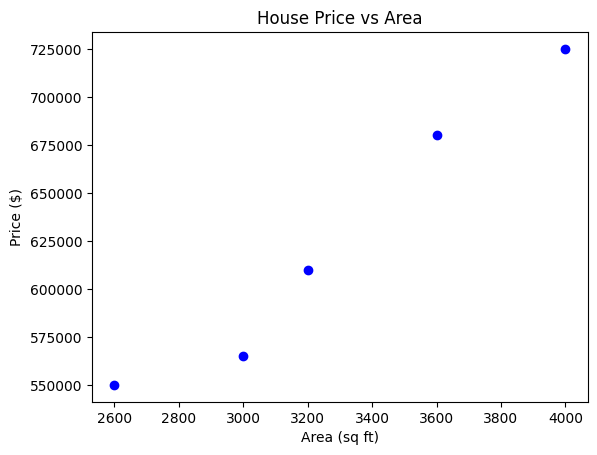

In [2]:
# Visualization:

plt.scatter(df['area'], df['price'], color='blue')
plt.title('House Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.show()

In [3]:
# Step 2: Data Preparation

X = df[['area']]  # Feature
y = df['price']   # Target

In [4]:
# Step 3: Model Building

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Print coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

Intercept: 180616.43835616432
Coefficient: 135.78767123287673


In [5]:
# Step 4: Model Evaluation

y_pred = model.predict(X)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R-squared:', metrics.r2_score(y, y_pred))

Mean Absolute Error: 11246.57534246575
Mean Squared Error: 186815068.4931509
Root Mean Squared Error: 13668.030893042014
R-squared: 0.9584301138199486


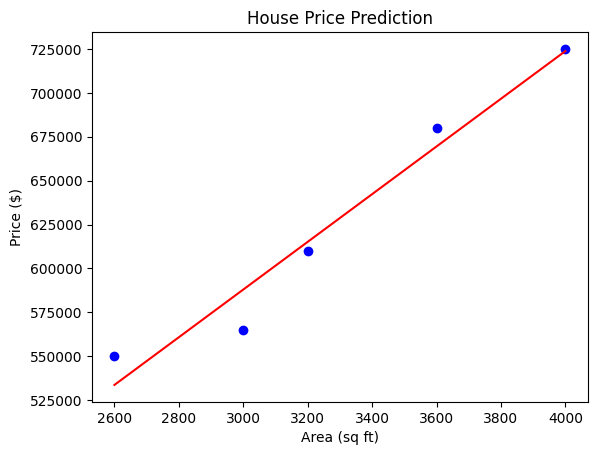

In [6]:
# Step 5: Visualization

# Plot regression line
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('House Price Prediction')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.show()

In [7]:
# Step 6: Making Predictions on New Data

# Load new areas data
new_areas = pd.read_csv('areas.csv')

# Make predictions
predicted_prices = model.predict(new_areas)

# Create results dataframe
results = new_areas.copy()
results['predicted_price'] = predicted_prices

print(results)

    area  predicted_price
0   1000     3.164041e+05
1   1500     3.842979e+05
2   2300     4.929281e+05
3   3540     6.613048e+05
4   4120     7.400616e+05
5   4560     7.998082e+05
6   5490     9.260908e+05
7   3460     6.504418e+05
8   4750     8.256079e+05
9   2300     4.929281e+05
10  9000     1.402705e+06
11  8600     1.348390e+06
12  7100     1.144709e+06


In [8]:
# Step 7: Handling Multiple Features (Bonus)

# Load dataset with multiple features
df_multi = pd.read_csv('homeprices-m.csv')

# Handle missing values (fill bedrooms median)
df_multi['bedrooms'] = df_multi['bedrooms'].fillna(df_multi['bedrooms'].median())

# Define features and target
X_multi = df_multi[['area', 'bedrooms', 'age']]
y_multi = df_multi['price']

# Train model
multi_model = LinearRegression()
multi_model.fit(X_multi, y_multi)

# Print coefficients
print('Intercept:', multi_model.intercept_)
print('Coefficients:', multi_model.coef_)

# Evaluate
y_multi_pred = multi_model.predict(X_multi)
print('R-squared:', metrics.r2_score(y_multi, y_multi_pred))

Intercept: 221323.00186540396
Coefficients: [  112.06244194 23388.88007794 -3231.71790863]
R-squared: 0.9550196399325821
